# $Importing$ $Libraries$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
import pickle
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier

# $Importing$ $Dataset$

In [2]:
df=pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# $Data$ $Visualization$

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


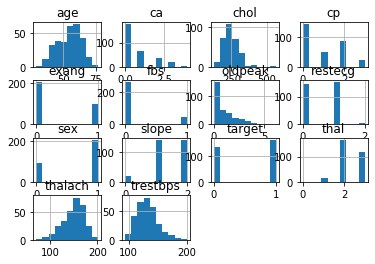

In [3]:
df.hist()
df.corr()

In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Dummy Variable trap

In [5]:
sex = pd.get_dummies(df['sex'],prefix='sex')
sex = sex.drop(['sex_0'],axis=1)

cp = pd.get_dummies(df['cp'],prefix='cp')
cp = cp.drop(['cp_3'],axis=1)

fbs = pd.get_dummies(df['fbs'],prefix='fbs')
fbs = fbs.drop(['fbs_0'],axis=1)

exang = pd.get_dummies(df['exang'],prefix='exang')
exang = exang.drop(['exang_0'],axis=1)

slope = pd.get_dummies(df['slope'],prefix='slope')
slope = slope.drop(['slope_0'],axis=1)

ca = pd.get_dummies(df['ca'],prefix='ca')
ca = ca.drop(['ca_4'],axis=1)

thal = pd.get_dummies(df['thal'],prefix='thal')
thal = thal.drop(['thal_0'],axis=1)

restecg = pd.get_dummies(df['restecg'],prefix='restecg')
restecg = restecg.drop(['restecg_2'],axis=1)

In [6]:
df = df.drop(['sex','fbs','exang','slope','ca','thal','cp','restecg'],axis=1)
df = pd.concat([df,sex,fbs,exang,slope,ca,thal,cp,restecg],axis=1)

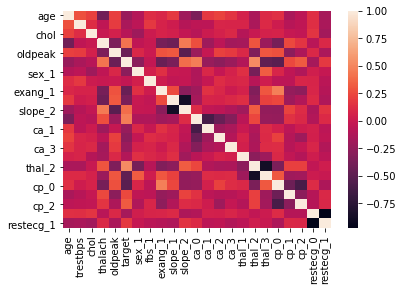

In [7]:
import seaborn as sns
sns.heatmap(df.corr())

Text(0.5, 1.0, 'Count of each Target Class')

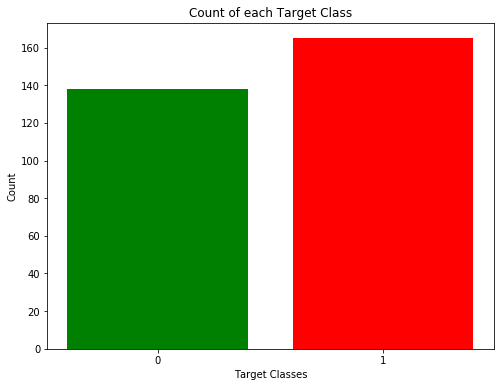

In [8]:
rcParams['figure.figsize'] = 8,6
plt.bar(df['target'].unique(), df['target'].value_counts(), color = ['red', 'green'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

In [9]:
y=df['target']
X=df.drop(['target'],axis=1)

# $Data$  $Preprocessing$



### With Standard Scaling

In [10]:
X=df.drop(['target'],axis=1)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

from sklearn.model_selection import cross_val_score

logreg=LogisticRegression()
print("Logistic {:.2f}%".format(np.mean(cross_val_score(logreg, X, y, cv=10))*100))

l = 0
j = 1
for i in range(1,50):
    knn=KNeighborsClassifier(n_neighbors=i)
    score = np.mean(cross_val_score(knn, X, y, cv=10))*100
    if score>l:
        l=score
        j=i
print("KNN {:.2f}%".format(l) + " for n_neighbors = " + str(j))

nb_classifier=GaussianNB()
print("Gaussian {:.2f}%".format(np.mean(cross_val_score(nb_classifier, X, y, cv=10))*100))

clf=SVC(kernel='rbf')
print("SVC {:.2f}%".format(np.mean(cross_val_score(clf, X, y, cv=10))*100))

s = SGDClassifier()
print("SGDClassifier {:.2f}%".format(np.mean(cross_val_score(s, X, y, cv=10))*100))

d = DecisionTreeClassifier()
print("DecisionTreeClassifier {:.2f}%".format(np.mean(cross_val_score(d, X, y, cv=10))*100))

d = RandomForestClassifier()
print("RandomForestClassifier {:.2f}%".format(np.mean(cross_val_score(d, X, y, cv=10))*100))

d = AdaBoostClassifier()
print("AdaBoostClassifier {:.2f}%".format(np.mean(cross_val_score(d, X, y, cv=10))*100))

d = MLPClassifier()
print("MLPClassifier {:.2f}%".format(np.mean(cross_val_score(d, X, y, cv=10))*100))

d = QuadraticDiscriminantAnalysis()
print("QuadraticDiscriminantAnalysis {:.2f}%".format(np.mean(cross_val_score(d, X, y, cv=10))*100))

d = GaussianProcessClassifier()
print("GaussianProcessClassifier {:.2f}%".format(np.mean(cross_val_score(d, X, y, cv=10))*100))

Logistic 85.78%
KNN 86.14% for n_neighbors = 45
Gaussian 83.83%
SVC 84.77%
SGDClassifier 79.87%
DecisionTreeClassifier 73.18%
RandomForestClassifier 83.13%
AdaBoostClassifier 79.80%
MLPClassifier 83.80%
QuadraticDiscriminantAnalysis 73.62%
GaussianProcessClassifier 81.16%


### Without Scaling

In [11]:
X=df.drop(['target'],axis=1)

from sklearn.model_selection import cross_val_score

logreg=LogisticRegression()
print("Logistic {:.2f}%".format(np.mean(cross_val_score(logreg, X, y, cv=10))*100))

l = 0
j = 1
for i in range(1,50):
    knn=KNeighborsClassifier(n_neighbors=i)
    score = np.mean(cross_val_score(knn, X, y, cv=10))*100
    if score>l:
        l=score
        j=i
print("KNN {:.2f}%".format(l) + " for n_neighbors = " + str(j))

nb_classifier=GaussianNB()
print("Gaussian {:.2f}%".format(np.mean(cross_val_score(nb_classifier, X, y, cv=10))*100))

clf=SVC(kernel='rbf')
print("SVC {:.2f}%".format(np.mean(cross_val_score(clf, X, y, cv=10))*100))

s = SGDClassifier()
print("SGDClassifier {:.2f}%".format(np.mean(cross_val_score(s, X, y, cv=10))*100))

d = DecisionTreeClassifier()
print("DecisionTreeClassifier {:.2f}%".format(np.mean(cross_val_score(d, X, y, cv=10))*100))

d = RandomForestClassifier()
print("RandomForestClassifier {:.2f}%".format(np.mean(cross_val_score(d, X, y, cv=10))*100))

d = AdaBoostClassifier()
print("AdaBoostClassifier {:.2f}%".format(np.mean(cross_val_score(d, X, y, cv=10))*100))

d = MLPClassifier()
print("MLPClassifier {:.2f}%".format(np.mean(cross_val_score(d, X, y, cv=10))*100))

d = QuadraticDiscriminantAnalysis()
print("QuadraticDiscriminantAnalysis {:.2f}%".format(np.mean(cross_val_score(d, X, y, cv=10))*100))

d = GaussianProcessClassifier()
print("GaussianProcessClassifier {:.2f}%".format(np.mean(cross_val_score(d, X, y, cv=10))*100))

Logistic 87.12%
KNN 68.33% for n_neighbors = 27
Gaussian 83.83%
SVC 65.04%
SGDClassifier 61.45%
DecisionTreeClassifier 74.18%
RandomForestClassifier 82.80%
AdaBoostClassifier 79.80%
MLPClassifier 83.81%
QuadraticDiscriminantAnalysis 74.95%
GaussianProcessClassifier 58.46%


### With Normalisation 

In [12]:
X=df.drop(['target'],axis=1)

X=(X-np.min(X))/(np.max(X)-np.min(X))

from sklearn.model_selection import cross_val_score

logreg=LogisticRegression()
print("Logistic {:.2f}%".format(np.mean(cross_val_score(logreg, X, y, cv=10))*100))

l = 0
j = 1
for i in range(1,50):
    knn=KNeighborsClassifier(n_neighbors=i)
    score = np.mean(cross_val_score(knn, X, y, cv=10))*100
    if score>l:
        l=score
        j=i
print("KNN {:.2f}%".format(l) + " for n_neighbors = " + str(j))

nb_classifier=GaussianNB()
print("Gaussian {:.2f}%".format(np.mean(cross_val_score(nb_classifier, X, y, cv=10))*100))

clf=SVC(kernel='rbf')
print("SVC {:.2f}%".format(np.mean(cross_val_score(clf, X, y, cv=10))*100))

s = SGDClassifier()
print("SGDClassifier {:.2f}%".format(np.mean(cross_val_score(s, X, y, cv=10))*100))

d = DecisionTreeClassifier()
print("DecisionTreeClassifier {:.2f}%".format(np.mean(cross_val_score(d, X, y, cv=10))*100))

d = RandomForestClassifier()
print("RandomForestClassifier {:.2f}%".format(np.mean(cross_val_score(d, X, y, cv=10))*100))

d = AdaBoostClassifier()
print("AdaBoostClassifier {:.2f}%".format(np.mean(cross_val_score(d, X, y, cv=10))*100))

d = MLPClassifier()
print("MLPClassifier {:.2f}%".format(np.mean(cross_val_score(d, X, y, cv=10))*100))

d = QuadraticDiscriminantAnalysis()
print("QuadraticDiscriminantAnalysis {:.2f}%".format(np.mean(cross_val_score(d, X, y, cv=10))*100))

d = GaussianProcessClassifier()
print("GaussianProcessClassifier {:.2f}%".format(np.mean(cross_val_score(d, X, y, cv=10))*100))

Logistic 85.78%
KNN 85.80% for n_neighbors = 46
Gaussian 83.83%
SVC 83.81%
SGDClassifier 78.19%
DecisionTreeClassifier 73.17%
RandomForestClassifier 83.77%
AdaBoostClassifier 79.80%
MLPClassifier 84.77%
QuadraticDiscriminantAnalysis 73.96%
GaussianProcessClassifier 85.77%
